In [1]:
%load_ext autoreload
%load_ext line_profiler
import sys
sys.path.append("..")

In [82]:
%autoreload

import numpy as np
import pickle

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]


import main

import darkhistory.physics as phys
import darkhistory.utilities as utils

from darkhistory.spec import spectools
from darkhistory.spec.spectrum import Spectrum

In [68]:
direc = '/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/complete/'

(highengphot_tf_interp,
     lowengphot_tf_interp,
     lowengelec_tf_interp,
     highengdep_interp,
     CMB_engloss_interp
    ) = main.load_trans_funcs(direc)

Loading transfer functions...
Loaded high energy photons...
Low energy photons...
Low energy electrons...
high energy deposition.

CMB losses.

Padding tflists with zeros...
high energy photons...
low energy photons...
low energy electrons...

high energy deposition.

CMB losses.

Generating TransferFuncInterp objects for each tflist...
Done.



In [69]:
ics_thomson_ref_tf=pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_thomson_ref_tf.raw", "rb")) 
ics_rel_ref_tf=pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_rel_ref_tf.raw", "rb"))
engloss_ref_tf=pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/engloss_ref_tf.raw", "rb"))

In [98]:
eleceng = lowengelec_tf_interp.eng
photeng = lowengphot_tf_interp.eng

mDM = phys.me + 2e5
tau = 1e28

# kinetic energy!
elec_spec_init = spectools.rebin_N_arr(np.array([2]), np.array([(mDM - phys.me)/2]), eleceng)
elec_spec_init.rs = 3000

phot_spec_init = Spectrum(photeng, np.zeros_like(photeng), rs = 3000)

# phot_spec_init = spectools.rebin_N_arr(np.array([2]), np.array([mDM/2]), photeng)
# phot_spec_init.rs = 3000

# elec_spec_init = Spectrum(eleceng, np.zeros_like(eleceng), rs=3000)

if elec_spec_init.spec_type == 'dNdE':
    elec_spec_init.switch_spec_type()
if phot_spec_init.spec_type == 'dNdE':
    phot_spec_init.switch_spec_type()
    
def rate_func_N(rs):
    return phys.rho_DM*rs**3/tau

def rate_func_eng(rs):
    return phys.rho_DM*rs**3/tau*mDM

b_elec_2e5_full = main.evolve(
    elec_spec_init, phot_spec_init,
    rate_func_N, rate_func_eng, 4,
    highengphot_tf_interp, lowengphot_tf_interp, lowengelec_tf_interp,
    highengdep_interp, CMB_engloss_interp, ics_only=False,
    ics_thomson_ref_tf=ics_thomson_ref_tf, ics_rel_ref_tf=ics_rel_ref_tf, engloss_ref_tf=engloss_ref_tf,
    coarsen_factor=30,std_soln=True, user=None, verbose=True
)



AHHHH YEAHHHH!
completed rs:  3000


/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


completed rs:  2911.3366006455212
completed rs:  2825.2936007527423
completed rs:  2741.79355581368
completed rs:  2660.7613101514676
completed rs:  2582.123929275168
completed rs:  2505.81063423381
completed rs:  2431.752737910555
completed rs:  2359.8835831996535
completed rs:  2290.1384830105526
completed rs:  2222.454662045146
completed rs:  2156.771200295771
completed rs:  2093.0289782130853
completed rs:  2031.1706234944859
completed rs:  1971.140459445162
completed rs:  1912.8844548653112
completed rs:  1856.3501754184138
completed rs:  1801.4867364367888
completed rs:  1748.2447571219598
completed rs:  1696.5763160986019
completed rs:  1646.4349082820697
completed rs:  1597.775403020682
completed rs:  1550.554003475088
completed rs:  1504.7282071981567
completed rs:  1460.256767879905
completed rs:  1417.099658223034
completed rs:  1375.2180339156607
completed rs:  1334.5741986688133
completed rs:  1295.131570287229
completed rs:  1256.8546477429068
completed rs:  1219.70897922

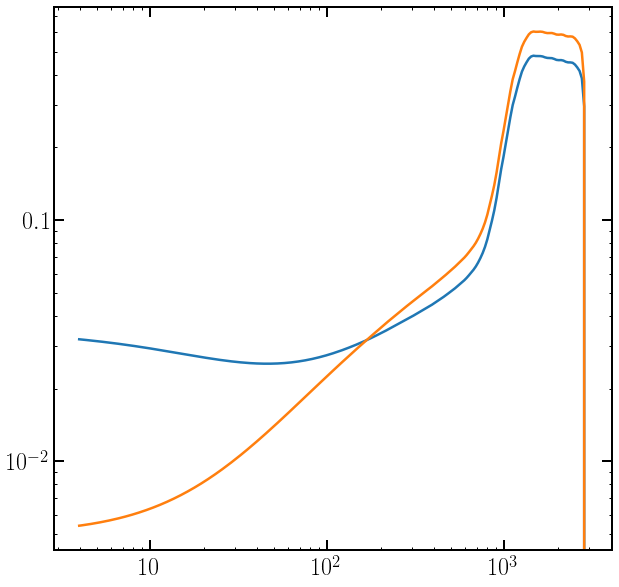

In [100]:
rs_vec = a[3].rs

plt.figure()
ax = plt.gca()
ax.loglog()

# mDM = 1e5, electrons, without prompt high-energy deposition
# plt.plot(rs_vec[1:], a[5][:,3])
# mDM = 1e5, electrons, with prompt high-energy deposition
plt.plot(rs_vec[1:], b_elec_2e5_full[5][:,3])
# mDM = phys.me + 2e4, electrons, with prompt high-energy deposition
plt.plot(rs_vec[1:], b_elec_2e4_full[5][:,3])
# # mDM = 1e5, photons
# plt.plot(rs_vec[1:], c_phot_test[5][:,3])
# # Electrons mDM = 1e8, ics_only
# plt.plot(rs_vec[1:], c_elec_1e8[5][:,3])

In [50]:
a = 5/3
type(a)

float